# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:04:22.724334: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:04:26.467027
2025-04-14 20:04:26.467027


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 937
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:04:20"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

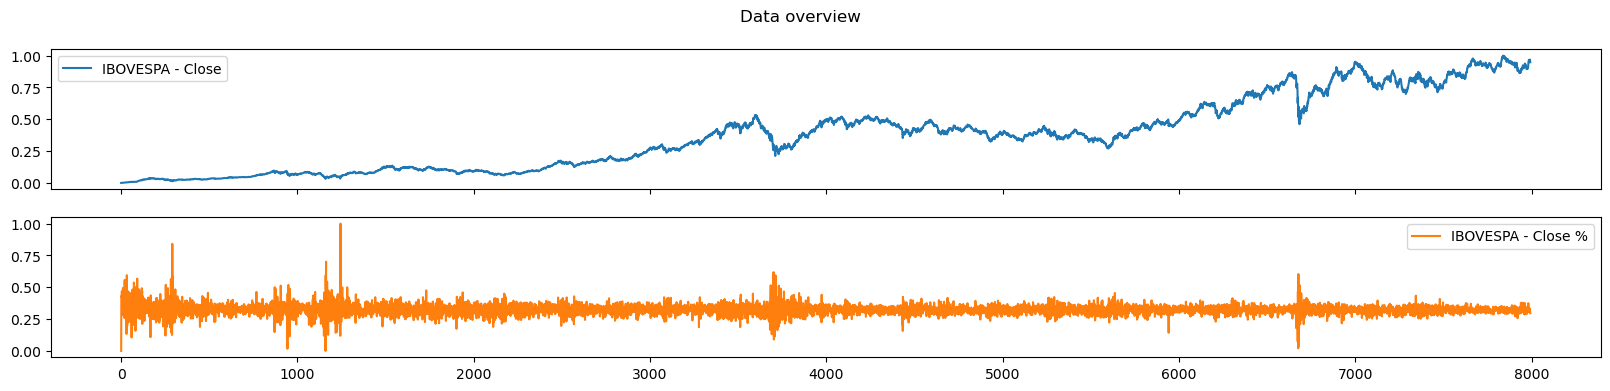

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

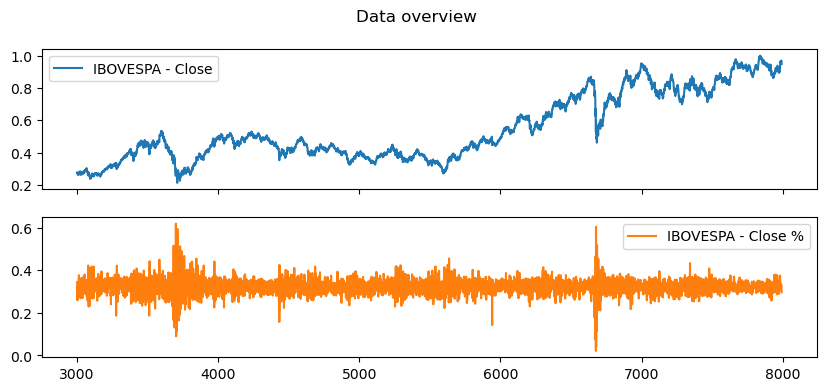

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

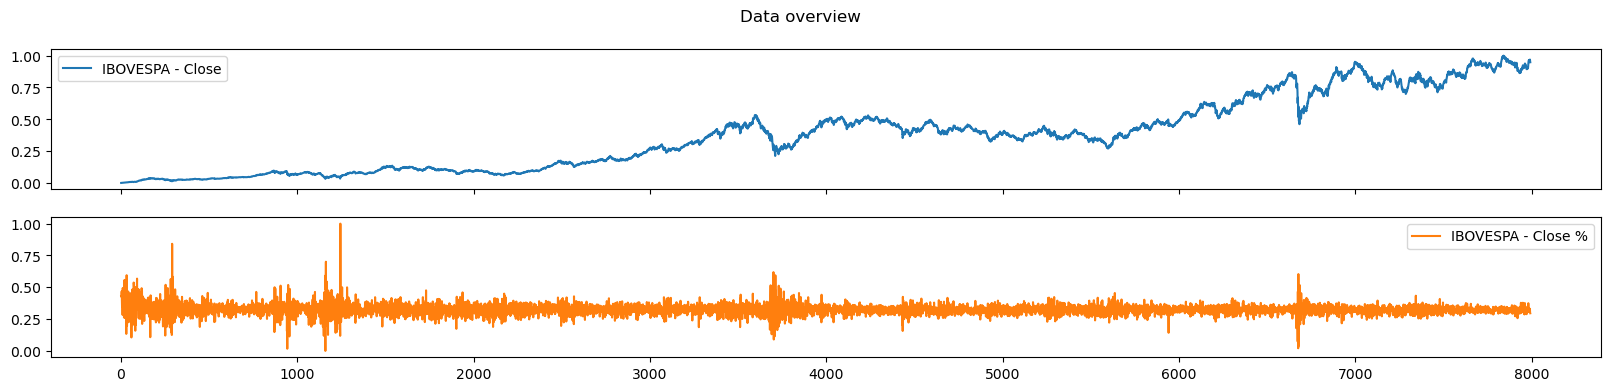

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

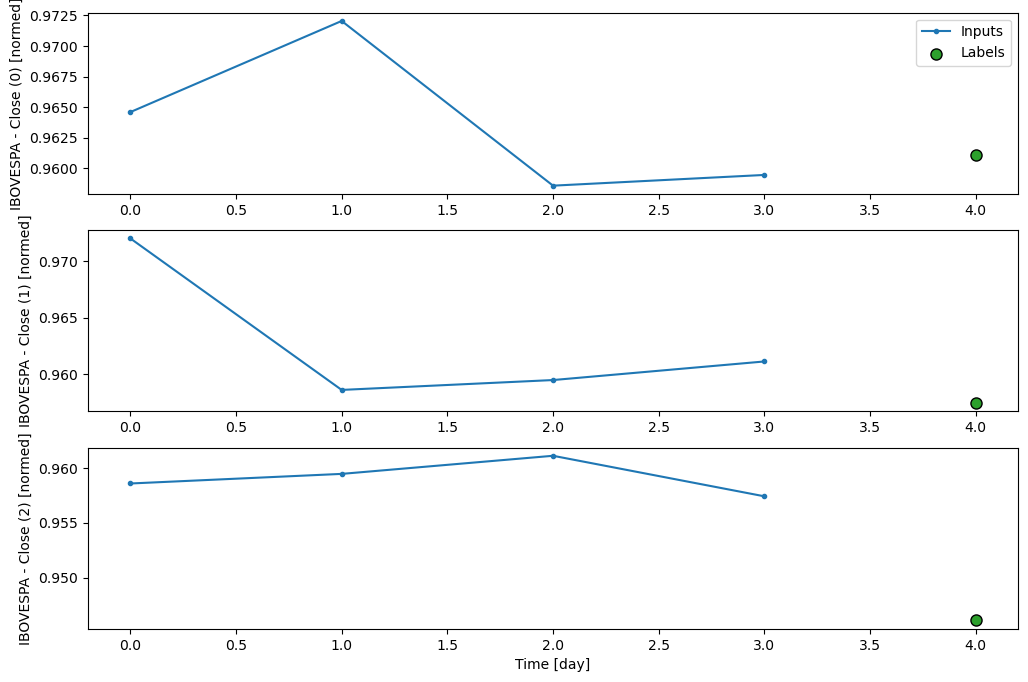

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:57 3s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 95.0161 - mean_squared_error: 2.0066e-04 - root_mean_squared_error: 0.0136  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 71.4657 - mean_squared_error: 1.7276e-04 - root_mean_squared_error: 0.0128

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 59.9822 - mean_squared_error: 1.7259e-04 - root_mean_squared_error: 0.0129

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.2487 - mean_squared_error: 1.8796e-04 - root_mean_squared_error: 0.0135

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.2196 - mean_squared_error: 2.0286e-04 - root_mean_squared_error: 0.0140

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.9486 - mean_squared_error: 2.1568e-04 - root_mean_squared_error: 0.0144

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 44.4804 - mean_squared_error: 2.2630e-04 - root_mean_squared_error: 0.0148

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 41.6183 - mean_squared_error: 2.4659e-04 - root_mean_squared_error: 0.0154

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 39.4001 - mean_squared_error: 2.6817e-04 - root_mean_squared_error: 0.0161

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 38.4162 - mean_squared_error: 2.8106e-04 - root_mean_squared_error: 0.0164

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 37.6425 - mean_squared_error: 2.9228e-04 - root_mean_squared_error: 0.0167

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 36.9250 - mean_squared_error: 3.1267e-04 - root_mean_squared_error: 0.0172

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 36.5375 - mean_squared_error: 3.3525e-04 - root_mean_squared_error: 0.0176

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 35.6091 - mean_squared_error: 4.3479e-04 - root_mean_squared_error: 0.0192

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 34.3336 - mean_squared_error: 6.7448e-04 - root_mean_squared_error: 0.0225

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 33.6122 - mean_squared_error: 8.0126e-04 - root_mean_squared_error: 0.0243

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 32.8432 - mean_squared_error: 9.2320e-04 - root_mean_squared_error: 0.0260

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 31.8890 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279    

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 31.1607 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 30.6911 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 30.0724 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 29.3217 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 28.6941 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 28.1114 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 27.8775 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370 - val_loss: 0.1190 - val_mean_absolute_error: 0.1190 - val_mean_absolute_percentage_error: 12.7381 - val_mean_squared_error: 0.0153 - val_root_mean_squared_error: 0.1237 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6070 - mean_absolute_error: 0.6070 - mean_absolute_percentage_error: 26208.1289 - mean_squared_error: 0.3685 - root_mean_squared_error: 0.6070

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5604 - mean_absolute_error: 0.5604 - mean_absolute_percentage_error: 9556.1562 - mean_squared_error: 0.3205 - root_mean_squared_error: 0.5648  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4592 - mean_absolute_error: 0.4592 - mean_absolute_percentage_error: 6335.8823 - mean_squared_error: 0.2449 - root_mean_squared_error: 0.4873

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3908 - mean_absolute_error: 0.3908 - mean_absolute_percentage_error: 4941.9346 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4352

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 4037.6047 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3942

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 3476.2366 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3653

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 3064.5986 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3421

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 2748.3599 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3230

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 2496.8618 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3069

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 2276.0947 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.2920

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 2094.7180 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2795

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 1953.5325 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2694

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 1831.8934 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2605

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1724 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 1717.6393 - mean_squared_error: 0.0774 - root_mean_squared_error: 0.2517

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 1625.2645 - mean_squared_error: 0.0735 - root_mean_squared_error: 0.2445

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 1536.8009 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2373

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 1464.0690 - mean_squared_error: 0.0668 - root_mean_squared_error: 0.2313

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 1393.3585 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2254

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 1329.7886 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2200

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 1272.2865 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2150

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 1268.0957 - mean_squared_error: 0.0585 - root_mean_squared_error: 0.2147 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308 - val_mean_absolute_percentage_error: 3.2868 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0353 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4359 - mean_absolute_error: 0.4359 - mean_absolute_percentage_error: 18795.7793 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4359

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 6614.5674 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.4081  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3509 - mean_absolute_error: 0.3509 - mean_absolute_percentage_error: 4718.4941 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3653

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3272 - mean_absolute_error: 0.3272 - mean_absolute_percentage_error: 4205.2041 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3482

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 3732.9744 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3301

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 3116.9062 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.3031

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2385 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 2724.3613 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2836

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 2328.5957 - mean_squared_error: 0.0760 - root_mean_squared_error: 0.2618

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 2078.1731 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2468

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 1990.6016 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2413

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 1926.2393 - mean_squared_error: 0.0640 - root_mean_squared_error: 0.2372

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 1824.0701 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2304

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1619 - mean_absolute_error: 0.1619 - mean_absolute_percentage_error: 1709.1061 - mean_squared_error: 0.0574 - root_mean_squared_error: 0.2226

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 1598.8003 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2148

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 1521.2744 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2091

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 1459.9526 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2045

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 1396.2361 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1997

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 1311.3895 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1930

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 1237.1758 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1870

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 1176.8265 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1820

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 1117.9723 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1770

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1061.1027 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1720

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 1010.2488 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1675

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 967.8467 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1637 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 926.1199 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1599 - val_loss: 0.0279 - val_mean_absolute_error: 0.0279 - val_mean_absolute_percentage_error: 2.9739 - val_mean_squared_error: 9.2306e-04 - val_root_mean_squared_error: 0.0304 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 8447.3447 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1960

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 2959.8450 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1610 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 1913.4176 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1323

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 1479.5248 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1166

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 1237.5341 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1064

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 1069.7401 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0986

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 945.7404 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0924 

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 865.7078 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0881

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 792.6990 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0840

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 721.2247 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0798

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 658.2534 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0760

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 606.3382 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0727

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 565.8284 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0700

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 528.1654 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0675

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 502.7410 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0657

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 473.4519 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0636

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 447.6830 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0618

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 426.4836 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0602

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 407.3758 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0587

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 390.0573 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0574

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 374.2805 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0562

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 371.7888 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0560 - val_loss: 0.0144 - val_mean_absolute_error: 0.0144 - val_mean_absolute_percentage_error: 1.5367 - val_mean_squared_error: 2.7483e-04 - val_root_mean_squared_error: 0.0166 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 4965.9160 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1152

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 1708.4092 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0889 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 1111.5480 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0742

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 847.0623 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0654 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 692.9429 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0593

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 597.1488 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0549

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 521.8721 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0512

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 468.9503 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 423.5859 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 389.5514 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 358.9442 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 335.1039 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 312.9528 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 293.8299 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 277.1334 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 262.4344 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 249.3726 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 238.5371 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 227.9274 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 220.4612 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363 - val_loss: 0.0242 - val_mean_absolute_error: 0.0242 - val_mean_absolute_percentage_error: 2.6798 - val_mean_squared_error: 7.4058e-04 - val_root_mean_squared_error: 0.0272 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 10458.9297 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2425

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 3783.1277 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2198  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 2486.3210 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1864

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 1900.3531 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1644

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 1556.9113 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1488

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 1327.8733 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1371

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 1162.8632 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1278

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 1037.6448 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1203

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 939.0162 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1140 

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 870.4017 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1095

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 802.3572 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1048

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 753.3268 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1013

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 714.1544 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0984

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 672.6863 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0953

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 633.3480 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0923

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 598.7565 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0895

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 568.0759 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0870

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 540.6590 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0847

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 515.9969 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0826

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 493.6856 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0806 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8771 - val_mean_squared_error: 1.0110e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 2621.5679 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0612

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 874.0389 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429  

 23/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 606.6723 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 464.6233 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 44/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 387.4122 - mean_squared_error: 9.3225e-04 - root_mean_squared_error: 0.0284

 56/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 325.5729 - mean_squared_error: 7.9350e-04 - root_mean_squared_error: 0.0259

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 282.2771 - mean_squared_error: 6.9440e-04 - root_mean_squared_error: 0.0240

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 247.7611 - mean_squared_error: 6.1412e-04 - root_mean_squared_error: 0.0224

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 223.2518 - mean_squared_error: 5.5656e-04 - root_mean_squared_error: 0.0212

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 203.5662 - mean_squared_error: 5.1012e-04 - root_mean_squared_error: 0.0202

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 187.3717 - mean_squared_error: 4.7222e-04 - root_mean_squared_error: 0.0193

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 172.7730 - mean_squared_error: 4.3967e-04 - root_mean_squared_error: 0.0186

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 161.3683 - mean_squared_error: 4.1518e-04 - root_mean_squared_error: 0.0181

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 150.7541 - mean_squared_error: 3.9274e-04 - root_mean_squared_error: 0.0176

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 142.2364 - mean_squared_error: 3.7453e-04 - root_mean_squared_error: 0.0172

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 134.1314 - mean_squared_error: 3.5710e-04 - root_mean_squared_error: 0.0167

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 127.5045 - mean_squared_error: 3.4282e-04 - root_mean_squared_error: 0.0164

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 121.0940 - mean_squared_error: 3.2907e-04 - root_mean_squared_error: 0.0161

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 115.7790 - mean_squared_error: 3.1883e-04 - root_mean_squared_error: 0.0159

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 110.9566 - mean_squared_error: 3.1047e-04 - root_mean_squared_error: 0.0157

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 107.2648 - mean_squared_error: 3.0421e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6659 - val_mean_squared_error: 5.7296e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 2889.0962 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0672

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 980.4444 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 652.7437 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 492.5207 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 406.5623 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 344.4329 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 303.2185 - mean_squared_error: 9.3757e-04 - root_mean_squared_error: 0.0284

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 271.6578 - mean_squared_error: 8.4720e-04 - root_mean_squared_error: 0.0268

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 244.7738 - mean_squared_error: 7.6955e-04 - root_mean_squared_error: 0.0253

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 223.1946 - mean_squared_error: 7.0705e-04 - root_mean_squared_error: 0.0242

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 209.2640 - mean_squared_error: 6.6718e-04 - root_mean_squared_error: 0.0234

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 194.8992 - mean_squared_error: 6.2656e-04 - root_mean_squared_error: 0.0226

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 181.6111 - mean_squared_error: 5.8911e-04 - root_mean_squared_error: 0.0219

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 171.0068 - mean_squared_error: 5.5919e-04 - root_mean_squared_error: 0.0212

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 160.9602 - mean_squared_error: 5.3065e-04 - root_mean_squared_error: 0.0207

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 152.1374 - mean_squared_error: 5.0547e-04 - root_mean_squared_error: 0.0201

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 144.3202 - mean_squared_error: 4.8311e-04 - root_mean_squared_error: 0.0196

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 137.8510 - mean_squared_error: 4.6480e-04 - root_mean_squared_error: 0.0193

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 131.5288 - mean_squared_error: 4.4763e-04 - root_mean_squared_error: 0.0189

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 125.8146 - mean_squared_error: 4.3232e-04 - root_mean_squared_error: 0.0186

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 124.9847 - mean_squared_error: 4.3010e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6516 - val_mean_squared_error: 5.5255e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 2664.4197 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0619

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 903.7297 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 592.9529 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 454.1974 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 388.3831 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 329.0234 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 286.8506 - mean_squared_error: 9.0474e-04 - root_mean_squared_error: 0.0284

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 257.3232 - mean_squared_error: 8.2182e-04 - root_mean_squared_error: 0.0269

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 232.0989 - mean_squared_error: 7.4944e-04 - root_mean_squared_error: 0.0255

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 213.2304 - mean_squared_error: 6.9461e-04 - root_mean_squared_error: 0.0244

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 203.7184 - mean_squared_error: 6.6704e-04 - root_mean_squared_error: 0.0239

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 195.1086 - mean_squared_error: 6.4222e-04 - root_mean_squared_error: 0.0234

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 187.2723 - mean_squared_error: 6.1969e-04 - root_mean_squared_error: 0.0229

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 177.2193 - mean_squared_error: 5.9097e-04 - root_mean_squared_error: 0.0223

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 165.8143 - mean_squared_error: 5.5881e-04 - root_mean_squared_error: 0.0217

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 155.9252 - mean_squared_error: 5.3065e-04 - root_mean_squared_error: 0.0211

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 147.2618 - mean_squared_error: 5.0589e-04 - root_mean_squared_error: 0.0205

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 140.7249 - mean_squared_error: 4.8741e-04 - root_mean_squared_error: 0.0201

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 136.3627 - mean_squared_error: 4.7545e-04 - root_mean_squared_error: 0.0199

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 130.8327 - mean_squared_error: 4.6069e-04 - root_mean_squared_error: 0.0195

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 125.3406 - mean_squared_error: 4.4659e-04 - root_mean_squared_error: 0.0193

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 120.3353 - mean_squared_error: 4.3385e-04 - root_mean_squared_error: 0.0190

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 119.1532 - mean_squared_error: 4.3085e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8621 - val_mean_squared_error: 9.3307e-05 - val_root_mean_squared_error: 0.0097 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 2901.8738 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0674

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 982.4002 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0492  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 634.5171 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 481.6128 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 392.9100 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 334.1701 - mean_squared_error: 9.8305e-04 - root_mean_squared_error: 0.0290

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 297.7702 - mean_squared_error: 8.8263e-04 - root_mean_squared_error: 0.0272

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 269.1967 - mean_squared_error: 8.0280e-04 - root_mean_squared_error: 0.0258

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 242.3657 - mean_squared_error: 7.2715e-04 - root_mean_squared_error: 0.0244

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 220.8452 - mean_squared_error: 6.6623e-04 - root_mean_squared_error: 0.0232

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 203.1668 - mean_squared_error: 6.1664e-04 - root_mean_squared_error: 0.0222

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 191.5558 - mean_squared_error: 5.8405e-04 - root_mean_squared_error: 0.0215

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 184.2622 - mean_squared_error: 5.6354e-04 - root_mean_squared_error: 0.0211

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 177.5576 - mean_squared_error: 5.4469e-04 - root_mean_squared_error: 0.0207

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 170.5256 - mean_squared_error: 5.2487e-04 - root_mean_squared_error: 0.0203

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 162.5550 - mean_squared_error: 5.0237e-04 - root_mean_squared_error: 0.0198

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 153.3435 - mean_squared_error: 4.7632e-04 - root_mean_squared_error: 0.0192

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 145.8045 - mean_squared_error: 4.5500e-04 - root_mean_squared_error: 0.0188

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 139.0386 - mean_squared_error: 4.3592e-04 - root_mean_squared_error: 0.0183

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 132.9305 - mean_squared_error: 4.1917e-04 - root_mean_squared_error: 0.0179

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 126.9463 - mean_squared_error: 4.0312e-04 - root_mean_squared_error: 0.0176

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 123.1396 - mean_squared_error: 3.9300e-04 - root_mean_squared_error: 0.0174 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7202 - val_mean_squared_error: 7.0123e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 2013.3795 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 671.1806 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 437.5728 - mean_squared_error: 8.4143e-04 - root_mean_squared_error: 0.0281

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 340.0738 - mean_squared_error: 6.8952e-04 - root_mean_squared_error: 0.0252

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 277.5569 - mean_squared_error: 5.8256e-04 - root_mean_squared_error: 0.0230

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 236.2897 - mean_squared_error: 5.0810e-04 - root_mean_squared_error: 0.0213

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 206.7935 - mean_squared_error: 4.5278e-04 - root_mean_squared_error: 0.0200

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 186.0436 - mean_squared_error: 4.1308e-04 - root_mean_squared_error: 0.0190

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 168.2401 - mean_squared_error: 3.7865e-04 - root_mean_squared_error: 0.0181

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 154.8664 - mean_squared_error: 3.5272e-04 - root_mean_squared_error: 0.0174

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 142.8205 - mean_squared_error: 3.3012e-04 - root_mean_squared_error: 0.0168

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 132.6933 - mean_squared_error: 3.1143e-04 - root_mean_squared_error: 0.0163

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 124.0468 - mean_squared_error: 2.9564e-04 - root_mean_squared_error: 0.0158

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 117.1063 - mean_squared_error: 2.8286e-04 - root_mean_squared_error: 0.0155

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 110.4996 - mean_squared_error: 2.7060e-04 - root_mean_squared_error: 0.0151

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 105.0968 - mean_squared_error: 2.6060e-04 - root_mean_squared_error: 0.0149

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 100.2506 - mean_squared_error: 2.5172e-04 - root_mean_squared_error: 0.0146

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 95.8780 - mean_squared_error: 2.4445e-04 - root_mean_squared_error: 0.0144 

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 91.5977 - mean_squared_error: 2.3845e-04 - root_mean_squared_error: 0.0143

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 88.0078 - mean_squared_error: 2.3368e-04 - root_mean_squared_error: 0.0141 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7421 - val_mean_squared_error: 7.4717e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 2587.7029 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0601

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 876.2731 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0440  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 566.0851 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 453.5172 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 381.6201 - mean_squared_error: 9.8615e-04 - root_mean_squared_error: 0.0295

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 322.9010 - mean_squared_error: 8.4548e-04 - root_mean_squared_error: 0.0270

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 278.3109 - mean_squared_error: 7.3622e-04 - root_mean_squared_error: 0.0249

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 247.7275 - mean_squared_error: 6.6002e-04 - root_mean_squared_error: 0.0234

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 221.9951 - mean_squared_error: 5.9524e-04 - root_mean_squared_error: 0.0221

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 202.9747 - mean_squared_error: 5.4713e-04 - root_mean_squared_error: 0.0210

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 188.4496 - mean_squared_error: 5.1075e-04 - root_mean_squared_error: 0.0202

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 177.1111 - mean_squared_error: 4.8293e-04 - root_mean_squared_error: 0.0196

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 166.2637 - mean_squared_error: 4.5673e-04 - root_mean_squared_error: 0.0190

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 156.7938 - mean_squared_error: 4.3425e-04 - root_mean_squared_error: 0.0185

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 148.4435 - mean_squared_error: 4.1435e-04 - root_mean_squared_error: 0.0181

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 141.0209 - mean_squared_error: 3.9664e-04 - root_mean_squared_error: 0.0177

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 136.1180 - mean_squared_error: 3.8493e-04 - root_mean_squared_error: 0.0174

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 131.0342 - mean_squared_error: 3.7283e-04 - root_mean_squared_error: 0.0171

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 126.8554 - mean_squared_error: 3.6299e-04 - root_mean_squared_error: 0.0169

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 122.9619 - mean_squared_error: 3.5410e-04 - root_mean_squared_error: 0.0167

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 119.3250 - mean_squared_error: 3.4632e-04 - root_mean_squared_error: 0.0165

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 116.7503 - mean_squared_error: 3.4113e-04 - root_mean_squared_error: 0.0164

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 112.7216 - mean_squared_error: 3.3316e-04 - root_mean_squared_error: 0.0162

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 109.3501 - mean_squared_error: 3.2657e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6379 - val_mean_squared_error: 5.3814e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 2766.7932 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0643

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 1033.5327 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0490 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 692.3741 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 534.3915 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 440.1081 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 382.1245 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 338.9564 - mean_squared_error: 9.3025e-04 - root_mean_squared_error: 0.0282

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 305.4048 - mean_squared_error: 8.4370e-04 - root_mean_squared_error: 0.0266

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 275.8230 - mean_squared_error: 7.6644e-04 - root_mean_squared_error: 0.0252

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 256.3657 - mean_squared_error: 7.1521e-04 - root_mean_squared_error: 0.0242

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 245.6797 - mean_squared_error: 6.8694e-04 - root_mean_squared_error: 0.0237

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 235.9401 - mean_squared_error: 6.6112e-04 - root_mean_squared_error: 0.0232

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 225.3288 - mean_squared_error: 6.3300e-04 - root_mean_squared_error: 0.0226

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 218.8244 - mean_squared_error: 6.1578e-04 - root_mean_squared_error: 0.0222

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 211.2578 - mean_squared_error: 5.9580e-04 - root_mean_squared_error: 0.0218

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 205.6102 - mean_squared_error: 5.8094e-04 - root_mean_squared_error: 0.0215

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 199.0087 - mean_squared_error: 5.6387e-04 - root_mean_squared_error: 0.0212

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 192.8639 - mean_squared_error: 5.4818e-04 - root_mean_squared_error: 0.0209

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 187.1269 - mean_squared_error: 5.3366e-04 - root_mean_squared_error: 0.0206

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 186.0247 - mean_squared_error: 5.3087e-04 - root_mean_squared_error: 0.0205

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 184.9368 - mean_squared_error: 5.2812e-04 - root_mean_squared_error: 0.0204

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 179.7025 - mean_squared_error: 5.1492e-04 - root_mean_squared_error: 0.0202

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 174.7868 - mean_squared_error: 5.0255e-04 - root_mean_squared_error: 0.0199

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 171.0642 - mean_squared_error: 4.9322e-04 - root_mean_squared_error: 0.0197

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 169.2681 - mean_squared_error: 4.8872e-04 - root_mean_squared_error: 0.0196

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 165.7983 - mean_squared_error: 4.8002e-04 - root_mean_squared_error: 0.0194

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 161.6763 - mean_squared_error: 4.6965e-04 - root_mean_squared_error: 0.0192

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 157.0190 - mean_squared_error: 4.5788e-04 - root_mean_squared_error: 0.0189

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 153.3590 - mean_squared_error: 4.4862e-04 - root_mean_squared_error: 0.0187

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 149.2087 - mean_squared_error: 4.3812e-04 - root_mean_squared_error: 0.0185

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 148.5410 - mean_squared_error: 4.3642e-04 - root_mean_squared_error: 0.0185

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 147.8799 - mean_squared_error: 4.3475e-04 - root_mean_squared_error: 0.0184

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 146.5771 - mean_squared_error: 4.3144e-04 - root_mean_squared_error: 0.0184

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 145.9352 - mean_squared_error: 4.2981e-04 - root_mean_squared_error: 0.0183

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 142.8167 - mean_squared_error: 4.2189e-04 - root_mean_squared_error: 0.0181

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 142.2106 - mean_squared_error: 4.2034e-04 - root_mean_squared_error: 0.0181

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 141.6102 - mean_squared_error: 4.1882e-04 - root_mean_squared_error: 0.0181

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 140.4260 - mean_squared_error: 4.1581e-04 - root_mean_squared_error: 0.0180

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 138.6901 - mean_squared_error: 4.1139e-04 - root_mean_squared_error: 0.0179

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 137.0010 - mean_squared_error: 4.0709e-04 - root_mean_squared_error: 0.0178

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 135.9000 - mean_squared_error: 4.0429e-04 - root_mean_squared_error: 0.0177

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 134.2846 - mean_squared_error: 4.0019e-04 - root_mean_squared_error: 0.0177

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 133.2311 - mean_squared_error: 3.9752e-04 - root_mean_squared_error: 0.0176

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 128.7075 - mean_squared_error: 3.8616e-04 - root_mean_squared_error: 0.0173

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 127.2742 - mean_squared_error: 3.8269e-04 - root_mean_squared_error: 0.0173

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 126.3382 - mean_squared_error: 3.8043e-04 - root_mean_squared_error: 0.0172

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 122.3077 - mean_squared_error: 3.7085e-04 - root_mean_squared_error: 0.0170

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 116.9615 - mean_squared_error: 3.5832e-04 - root_mean_squared_error: 0.0167

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 116.1853 - mean_squared_error: 3.5652e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8055 - val_mean_squared_error: 8.2756e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 2348.7595 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 924.0562 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 634.4987 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 497.4808 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 392.8622 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 336.9547 - mean_squared_error: 8.8988e-04 - root_mean_squared_error: 0.0286

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 296.3257 - mean_squared_error: 7.9824e-04 - root_mean_squared_error: 0.0269

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 262.6016 - mean_squared_error: 7.1897e-04 - root_mean_squared_error: 0.0254

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 242.9869 - mean_squared_error: 6.7156e-04 - root_mean_squared_error: 0.0244

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 222.6229 - mean_squared_error: 6.2140e-04 - root_mean_squared_error: 0.0233

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 208.8730 - mean_squared_error: 5.8702e-04 - root_mean_squared_error: 0.0226

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 194.1298 - mean_squared_error: 5.4979e-04 - root_mean_squared_error: 0.0218

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 183.9015 - mean_squared_error: 5.2397e-04 - root_mean_squared_error: 0.0212

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 173.7431 - mean_squared_error: 4.9864e-04 - root_mean_squared_error: 0.0206

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 161.9891 - mean_squared_error: 4.6926e-04 - root_mean_squared_error: 0.0199

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 151.0916 - mean_squared_error: 4.4185e-04 - root_mean_squared_error: 0.0193

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 142.3782 - mean_squared_error: 4.1973e-04 - root_mean_squared_error: 0.0187

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 135.3133 - mean_squared_error: 4.0168e-04 - root_mean_squared_error: 0.0183

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 127.9027 - mean_squared_error: 3.8263e-04 - root_mean_squared_error: 0.0178

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 121.8154 - mean_squared_error: 3.6693e-04 - root_mean_squared_error: 0.0174

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 116.3359 - mean_squared_error: 3.5288e-04 - root_mean_squared_error: 0.0170

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 111.3761 - mean_squared_error: 3.4070e-04 - root_mean_squared_error: 0.0167

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 106.8624 - mean_squared_error: 3.2981e-04 - root_mean_squared_error: 0.0164

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 104.7545 - mean_squared_error: 3.2477e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7413 - val_mean_squared_error: 7.4572e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 1729.5068 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0403

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 577.5572 - mean_squared_error: 8.5555e-04 - root_mean_squared_error: 0.0287

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 386.1659 - mean_squared_error: 6.3853e-04 - root_mean_squared_error: 0.0245

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 292.3149 - mean_squared_error: 5.1000e-04 - root_mean_squared_error: 0.0217

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 238.5044 - mean_squared_error: 4.3000e-04 - root_mean_squared_error: 0.0197

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 203.0124 - mean_squared_error: 3.7467e-04 - root_mean_squared_error: 0.0183

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 179.3462 - mean_squared_error: 3.3644e-04 - root_mean_squared_error: 0.0172

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 159.8172 - mean_squared_error: 3.0436e-04 - root_mean_squared_error: 0.0163

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 145.5787 - mean_squared_error: 2.8079e-04 - root_mean_squared_error: 0.0156

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 134.8030 - mean_squared_error: 2.6305e-04 - root_mean_squared_error: 0.0150

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 126.4463 - mean_squared_error: 2.4985e-04 - root_mean_squared_error: 0.0146

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 117.8316 - mean_squared_error: 2.3682e-04 - root_mean_squared_error: 0.0142

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 110.4320 - mean_squared_error: 2.2580e-04 - root_mean_squared_error: 0.0139

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 103.5010 - mean_squared_error: 2.1551e-04 - root_mean_squared_error: 0.0136

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 97.9087 - mean_squared_error: 2.0707e-04 - root_mean_squared_error: 0.0133 

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 92.5625 - mean_squared_error: 1.9892e-04 - root_mean_squared_error: 0.0130

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 88.1725 - mean_squared_error: 1.9221e-04 - root_mean_squared_error: 0.0128

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 84.2216 - mean_squared_error: 1.8625e-04 - root_mean_squared_error: 0.0126

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 80.6467 - mean_squared_error: 1.8158e-04 - root_mean_squared_error: 0.0125

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 77.3936 - mean_squared_error: 1.7755e-04 - root_mean_squared_error: 0.0124

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 75.6277 - mean_squared_error: 1.7541e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6570 - val_mean_squared_error: 5.7677e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 2224.4866 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 754.3512 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 505.1763 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 405.2556 - mean_squared_error: 9.4469e-04 - root_mean_squared_error: 0.0297

 42/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 358.1057 - mean_squared_error: 8.5409e-04 - root_mean_squared_error: 0.0280

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 317.3117 - mean_squared_error: 7.7153e-04 - root_mean_squared_error: 0.0265

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 275.6321 - mean_squared_error: 6.8352e-04 - root_mean_squared_error: 0.0248

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 242.1393 - mean_squared_error: 6.1002e-04 - root_mean_squared_error: 0.0232

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 214.7498 - mean_squared_error: 5.4811e-04 - root_mean_squared_error: 0.0218

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 193.4619 - mean_squared_error: 4.9907e-04 - root_mean_squared_error: 0.0207

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 178.7964 - mean_squared_error: 4.6518e-04 - root_mean_squared_error: 0.0199

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 165.3818 - mean_squared_error: 4.3487e-04 - root_mean_squared_error: 0.0192

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 154.0404 - mean_squared_error: 4.1034e-04 - root_mean_squared_error: 0.0186

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 145.8303 - mean_squared_error: 3.9274e-04 - root_mean_squared_error: 0.0182

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 140.6386 - mean_squared_error: 3.8156e-04 - root_mean_squared_error: 0.0179

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 134.5366 - mean_squared_error: 3.6828e-04 - root_mean_squared_error: 0.0176

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 127.8309 - mean_squared_error: 3.5350e-04 - root_mean_squared_error: 0.0172

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 121.8271 - mean_squared_error: 3.4015e-04 - root_mean_squared_error: 0.0169

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 115.4900 - mean_squared_error: 3.2599e-04 - root_mean_squared_error: 0.0165

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 110.2544 - mean_squared_error: 3.1429e-04 - root_mean_squared_error: 0.0162

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 105.1458 - mean_squared_error: 3.0365e-04 - root_mean_squared_error: 0.0159

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 100.8743 - mean_squared_error: 2.9509e-04 - root_mean_squared_error: 0.0157

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 98.5562 - mean_squared_error: 2.9051e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9389 - val_mean_squared_error: 1.0766e-04 - val_root_mean_squared_error: 0.0104 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 1891.9221 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 630.2104 - mean_squared_error: 9.9863e-04 - root_mean_squared_error: 0.0308

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 412.8361 - mean_squared_error: 6.8639e-04 - root_mean_squared_error: 0.0249

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 314.2293 - mean_squared_error: 5.3296e-04 - root_mean_squared_error: 0.0216

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 252.9335 - mean_squared_error: 4.3447e-04 - root_mean_squared_error: 0.0192

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 215.8541 - mean_squared_error: 3.7385e-04 - root_mean_squared_error: 0.0176

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 197.1645 - mean_squared_error: 3.4297e-04 - root_mean_squared_error: 0.0168

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 180.0190 - mean_squared_error: 3.1444e-04 - root_mean_squared_error: 0.0159

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 167.3329 - mean_squared_error: 2.9324e-04 - root_mean_squared_error: 0.0153

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 156.4837 - mean_squared_error: 2.7508e-04 - root_mean_squared_error: 0.0148

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 149.3182 - mean_squared_error: 2.6314e-04 - root_mean_squared_error: 0.0144

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 138.8670 - mean_squared_error: 2.4595e-04 - root_mean_squared_error: 0.0139

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 130.7585 - mean_squared_error: 2.3325e-04 - root_mean_squared_error: 0.0135

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 125.1470 - mean_squared_error: 2.2490e-04 - root_mean_squared_error: 0.0132

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 120.0459 - mean_squared_error: 2.1747e-04 - root_mean_squared_error: 0.0130

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 114.7519 - mean_squared_error: 2.0979e-04 - root_mean_squared_error: 0.0128

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 109.3819 - mean_squared_error: 2.0205e-04 - root_mean_squared_error: 0.0126

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 105.5747 - mean_squared_error: 1.9656e-04 - root_mean_squared_error: 0.0124

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 101.0897 - mean_squared_error: 1.9005e-04 - root_mean_squared_error: 0.0122

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 97.8823 - mean_squared_error: 1.8537e-04 - root_mean_squared_error: 0.0121 

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 94.8924 - mean_squared_error: 1.8100e-04 - root_mean_squared_error: 0.0119

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 91.3321 - mean_squared_error: 1.7577e-04 - root_mean_squared_error: 0.0118

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 87.7065 - mean_squared_error: 1.7048e-04 - root_mean_squared_error: 0.0116

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 84.7048 - mean_squared_error: 1.6623e-04 - root_mean_squared_error: 0.0115

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 81.6260 - mean_squared_error: 1.6242e-04 - root_mean_squared_error: 0.0113

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 78.7847 - mean_squared_error: 1.5905e-04 - root_mean_squared_error: 0.0113

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 76.1542 - mean_squared_error: 1.5604e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6260 - val_mean_squared_error: 5.1760e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 1140.8428 - mean_squared_error: 7.1458e-04 - root_mean_squared_error: 0.0267

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 462.7469 - mean_squared_error: 4.1056e-04 - root_mean_squared_error: 0.0199  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 296.0168 - mean_squared_error: 2.9946e-04 - root_mean_squared_error: 0.0169

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 230.4442 - mean_squared_error: 2.4695e-04 - root_mean_squared_error: 0.0152

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 191.1171 - mean_squared_error: 2.1357e-04 - root_mean_squared_error: 0.0140

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 164.4822 - mean_squared_error: 1.8924e-04 - root_mean_squared_error: 0.0131

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 139.6644 - mean_squared_error: 1.6528e-04 - root_mean_squared_error: 0.0122

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 121.9842 - mean_squared_error: 1.4734e-04 - root_mean_squared_error: 0.0114

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 107.7134 - mean_squared_error: 1.3232e-04 - root_mean_squared_error: 0.0108

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 97.4827 - mean_squared_error: 1.2134e-04 - root_mean_squared_error: 0.0103 

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 89.2085 - mean_squared_error: 1.1246e-04 - root_mean_squared_error: 0.0098

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 81.8490 - mean_squared_error: 1.0515e-04 - root_mean_squared_error: 0.0095

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 75.7325 - mean_squared_error: 9.9581e-05 - root_mean_squared_error: 0.0092

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 70.9253 - mean_squared_error: 9.5333e-05 - root_mean_squared_error: 0.0091

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 66.4323 - mean_squared_error: 9.1547e-05 - root_mean_squared_error: 0.0089

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 62.8140 - mean_squared_error: 8.8521e-05 - root_mean_squared_error: 0.0088

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 59.3612 - mean_squared_error: 8.5701e-05 - root_mean_squared_error: 0.0086

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 56.5312 - mean_squared_error: 8.3550e-05 - root_mean_squared_error: 0.0085

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 54.3942 - mean_squared_error: 8.2171e-05 - root_mean_squared_error: 0.0085

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 52.0595 - mean_squared_error: 8.1723e-05 - root_mean_squared_error: 0.0085

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 49.7741 - mean_squared_error: 8.2602e-05 - root_mean_squared_error: 0.0086

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 48.3204 - mean_squared_error: 8.3468e-05 - root_mean_squared_error: 0.0086 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6683 - val_mean_squared_error: 5.8599e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 2050.4666 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 697.2841 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 453.7444 - mean_squared_error: 9.2498e-04 - root_mean_squared_error: 0.0294

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 346.2193 - mean_squared_error: 7.4147e-04 - root_mean_squared_error: 0.0261

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 283.6378 - mean_squared_error: 6.2621e-04 - root_mean_squared_error: 0.0237

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 242.0087 - mean_squared_error: 5.4582e-04 - root_mean_squared_error: 0.0220

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 216.2049 - mean_squared_error: 4.9467e-04 - root_mean_squared_error: 0.0208

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 197.5638 - mean_squared_error: 4.5689e-04 - root_mean_squared_error: 0.0199

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 178.0850 - mean_squared_error: 4.1681e-04 - root_mean_squared_error: 0.0189

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 162.4598 - mean_squared_error: 3.8493e-04 - root_mean_squared_error: 0.0181

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 149.6227 - mean_squared_error: 3.6023e-04 - root_mean_squared_error: 0.0175

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 138.8789 - mean_squared_error: 3.4249e-04 - root_mean_squared_error: 0.0171

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 130.3812 - mean_squared_error: 3.2853e-04 - root_mean_squared_error: 0.0167

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 122.3892 - mean_squared_error: 3.1501e-04 - root_mean_squared_error: 0.0164

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 115.4174 - mean_squared_error: 3.0303e-04 - root_mean_squared_error: 0.0161

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 109.7242 - mean_squared_error: 2.9319e-04 - root_mean_squared_error: 0.0159

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 104.2249 - mean_squared_error: 2.8417e-04 - root_mean_squared_error: 0.0156

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 99.6676 - mean_squared_error: 2.7729e-04 - root_mean_squared_error: 0.0155 

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 95.2061 - mean_squared_error: 2.7112e-04 - root_mean_squared_error: 0.0153

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 91.1679 - mean_squared_error: 2.6570e-04 - root_mean_squared_error: 0.0152 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7806 - val_mean_squared_error: 8.2903e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 3585.7217 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0833

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 1242.5771 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 808.6171 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 626.8988 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0488

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 510.1474 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 433.1480 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 378.1566 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 339.5219 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 306.4400 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 281.6508 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 259.3571 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 240.6458 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 224.6928 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 210.9100 - mean_squared_error: 9.6292e-04 - root_mean_squared_error: 0.0277

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 198.8710 - mean_squared_error: 9.1291e-04 - root_mean_squared_error: 0.0269

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 188.2573 - mean_squared_error: 8.6878e-04 - root_mean_squared_error: 0.0262

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 178.8228 - mean_squared_error: 8.2983e-04 - root_mean_squared_error: 0.0255

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 170.3754 - mean_squared_error: 7.9560e-04 - root_mean_squared_error: 0.0250

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 162.7623 - mean_squared_error: 7.6504e-04 - root_mean_squared_error: 0.0245

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 158.4395 - mean_squared_error: 7.4772e-04 - root_mean_squared_error: 0.0242 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7002 - val_mean_squared_error: 6.6529e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 1942.2800 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 659.0496 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 429.6897 - mean_squared_error: 8.3200e-04 - root_mean_squared_error: 0.0280

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 328.4525 - mean_squared_error: 6.7365e-04 - root_mean_squared_error: 0.0249

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 269.2610 - mean_squared_error: 5.7087e-04 - root_mean_squared_error: 0.0227

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 232.3620 - mean_squared_error: 5.0296e-04 - root_mean_squared_error: 0.0212

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 209.2321 - mean_squared_error: 4.5878e-04 - root_mean_squared_error: 0.0201

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 185.8497 - mean_squared_error: 4.1293e-04 - root_mean_squared_error: 0.0190

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 167.6211 - mean_squared_error: 3.7649e-04 - root_mean_squared_error: 0.0180

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 153.9912 - mean_squared_error: 3.4908e-04 - root_mean_squared_error: 0.0172

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 141.7588 - mean_squared_error: 3.2508e-04 - root_mean_squared_error: 0.0166

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 132.2381 - mean_squared_error: 3.0663e-04 - root_mean_squared_error: 0.0161

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 123.4054 - mean_squared_error: 2.8962e-04 - root_mean_squared_error: 0.0156

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 116.3381 - mean_squared_error: 2.7595e-04 - root_mean_squared_error: 0.0152

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 109.6288 - mean_squared_error: 2.6289e-04 - root_mean_squared_error: 0.0148

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 104.1546 - mean_squared_error: 2.5222e-04 - root_mean_squared_error: 0.0145

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 98.8691 - mean_squared_error: 2.4200e-04 - root_mean_squared_error: 0.0142 

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 94.1473 - mean_squared_error: 2.3344e-04 - root_mean_squared_error: 0.0139

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 89.9020 - mean_squared_error: 2.2667e-04 - root_mean_squared_error: 0.0137

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 86.0613 - mean_squared_error: 2.2079e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9044 - val_mean_squared_error: 1.0729e-04 - val_root_mean_squared_error: 0.0104 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 1646.3264 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 557.3393 - mean_squared_error: 8.1730e-04 - root_mean_squared_error: 0.0281

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 362.2807 - mean_squared_error: 5.8552e-04 - root_mean_squared_error: 0.0234

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 275.8532 - mean_squared_error: 4.6498e-04 - root_mean_squared_error: 0.0206

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 225.6667 - mean_squared_error: 3.9017e-04 - root_mean_squared_error: 0.0187

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 194.5010 - mean_squared_error: 3.4184e-04 - root_mean_squared_error: 0.0173

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 170.0397 - mean_squared_error: 3.0295e-04 - root_mean_squared_error: 0.0162

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 156.7735 - mean_squared_error: 2.8158e-04 - root_mean_squared_error: 0.0155

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 146.7830 - mean_squared_error: 2.6536e-04 - root_mean_squared_error: 0.0150

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 138.1194 - mean_squared_error: 2.5129e-04 - root_mean_squared_error: 0.0146

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 128.7710 - mean_squared_error: 2.3625e-04 - root_mean_squared_error: 0.0141

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 122.2521 - mean_squared_error: 2.2617e-04 - root_mean_squared_error: 0.0137

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 115.0744 - mean_squared_error: 2.1548e-04 - root_mean_squared_error: 0.0134

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 108.1896 - mean_squared_error: 2.0541e-04 - root_mean_squared_error: 0.0131

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 103.7323 - mean_squared_error: 1.9899e-04 - root_mean_squared_error: 0.0129

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 101.1481 - mean_squared_error: 1.9525e-04 - root_mean_squared_error: 0.0128

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 99.6653 - mean_squared_error: 1.9310e-04 - root_mean_squared_error: 0.0127 

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 96.3866 - mean_squared_error: 1.8829e-04 - root_mean_squared_error: 0.0125

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 92.5084 - mean_squared_error: 1.8261e-04 - root_mean_squared_error: 0.0123

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 88.9624 - mean_squared_error: 1.7738e-04 - root_mean_squared_error: 0.0122

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 85.3606 - mean_squared_error: 1.7208e-04 - root_mean_squared_error: 0.0120

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 82.0688 - mean_squared_error: 1.6731e-04 - root_mean_squared_error: 0.0118

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 79.9277 - mean_squared_error: 1.6436e-04 - root_mean_squared_error: 0.0117

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 77.0781 - mean_squared_error: 1.6123e-04 - root_mean_squared_error: 0.0116

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 75.4747 - mean_squared_error: 1.5967e-04 - root_mean_squared_error: 0.0116

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 73.6956 - mean_squared_error: 1.5805e-04 - root_mean_squared_error: 0.0116

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 72.0079 - mean_squared_error: 1.5654e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6966 - val_mean_squared_error: 6.5559e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 1437.8186 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0336

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 532.1076 - mean_squared_error: 6.3977e-04 - root_mean_squared_error: 0.0248

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 367.7650 - mean_squared_error: 4.7035e-04 - root_mean_squared_error: 0.0209

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 280.9926 - mean_squared_error: 3.7126e-04 - root_mean_squared_error: 0.0183

 42/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 222.4443 - mean_squared_error: 3.0078e-04 - root_mean_squared_error: 0.0163

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 193.7457 - mean_squared_error: 2.6536e-04 - root_mean_squared_error: 0.0152

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 176.5688 - mean_squared_error: 2.4388e-04 - root_mean_squared_error: 0.0145

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 158.9328 - mean_squared_error: 2.2156e-04 - root_mean_squared_error: 0.0137

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 142.0981 - mean_squared_error: 1.9999e-04 - root_mean_squared_error: 0.0129

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 129.9108 - mean_squared_error: 1.8429e-04 - root_mean_squared_error: 0.0124

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 119.8506 - mean_squared_error: 1.7134e-04 - root_mean_squared_error: 0.0119

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 111.3876 - mean_squared_error: 1.6057e-04 - root_mean_squared_error: 0.0115

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 104.8341 - mean_squared_error: 1.5263e-04 - root_mean_squared_error: 0.0112

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 99.6953 - mean_squared_error: 1.4684e-04 - root_mean_squared_error: 0.0110 

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 95.0903 - mean_squared_error: 1.4188e-04 - root_mean_squared_error: 0.0108

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 89.4811 - mean_squared_error: 1.3601e-04 - root_mean_squared_error: 0.0106

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 85.4115 - mean_squared_error: 1.3182e-04 - root_mean_squared_error: 0.0104

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 80.5839 - mean_squared_error: 1.2675e-04 - root_mean_squared_error: 0.0102

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 76.6623 - mean_squared_error: 1.2262e-04 - root_mean_squared_error: 0.0101

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 73.4481 - mean_squared_error: 1.1923e-04 - root_mean_squared_error: 0.0100

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 70.2411 - mean_squared_error: 1.1586e-04 - root_mean_squared_error: 0.0098

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 67.3310 - mean_squared_error: 1.1299e-04 - root_mean_squared_error: 0.0097

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 64.6798 - mean_squared_error: 1.1139e-04 - root_mean_squared_error: 0.0097

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 62.2524 - mean_squared_error: 1.1052e-04 - root_mean_squared_error: 0.0097

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 60.4128 - mean_squared_error: 1.1001e-04 - root_mean_squared_error: 0.0097 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6669 - val_mean_squared_error: 5.8008e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 4:43 1s/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 1310.2173 - mean_squared_error: 9.3809e-04 - root_mean_squared_error: 0.0306

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 512.7838 - mean_squared_error: 5.5768e-04 - root_mean_squared_error: 0.0232  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 349.1666 - mean_squared_error: 4.1899e-04 - root_mean_squared_error: 0.0199

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 266.1051 - mean_squared_error: 3.3881e-04 - root_mean_squared_error: 0.0177

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 207.2268 - mean_squared_error: 2.7632e-04 - root_mean_squared_error: 0.0159

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 171.7214 - mean_squared_error: 2.3617e-04 - root_mean_squared_error: 0.0146

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 149.1678 - mean_squared_error: 2.0937e-04 - root_mean_squared_error: 0.0136

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 131.1672 - mean_squared_error: 1.8718e-04 - root_mean_squared_error: 0.0128

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 117.4288 - mean_squared_error: 1.6986e-04 - root_mean_squared_error: 0.0121

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 106.5559 - mean_squared_error: 1.5607e-04 - root_mean_squared_error: 0.0116

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 97.7160 - mean_squared_error: 1.4539e-04 - root_mean_squared_error: 0.0111 

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 90.3764 - mean_squared_error: 1.3716e-04 - root_mean_squared_error: 0.0108

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 84.1695 - mean_squared_error: 1.3039e-04 - root_mean_squared_error: 0.0105

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 78.8446 - mean_squared_error: 1.2469e-04 - root_mean_squared_error: 0.0103

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 74.2197 - mean_squared_error: 1.1969e-04 - root_mean_squared_error: 0.0101

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 70.4566 - mean_squared_error: 1.1561e-04 - root_mean_squared_error: 0.0100

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 67.6307 - mean_squared_error: 1.1258e-04 - root_mean_squared_error: 0.0098

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.8005 - mean_squared_error: 1.0968e-04 - root_mean_squared_error: 0.0097

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 62.2240 - mean_squared_error: 1.0765e-04 - root_mean_squared_error: 0.0096

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 60.0736 - mean_squared_error: 1.0651e-04 - root_mean_squared_error: 0.0096

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 57.8923 - mean_squared_error: 1.0561e-04 - root_mean_squared_error: 0.0096

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 57.3282 - mean_squared_error: 1.0539e-04 - root_mean_squared_error: 0.0096 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6597 - val_mean_squared_error: 5.6423e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 1336.2556 - mean_squared_error: 9.7869e-04 - root_mean_squared_error: 0.0313

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 594.2621 - mean_squared_error: 6.4223e-04 - root_mean_squared_error: 0.0250  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 448.5292 - mean_squared_error: 5.1628e-04 - root_mean_squared_error: 0.0222

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 306.3236 - mean_squared_error: 3.8293e-04 - root_mean_squared_error: 0.0189

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 243.0491 - mean_squared_error: 3.1589e-04 - root_mean_squared_error: 0.0170

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 197.3758 - mean_squared_error: 2.6445e-04 - root_mean_squared_error: 0.0154

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 174.0184 - mean_squared_error: 2.3722e-04 - root_mean_squared_error: 0.0145

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 154.3888 - mean_squared_error: 2.1367e-04 - root_mean_squared_error: 0.0137

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 139.1654 - mean_squared_error: 1.9495e-04 - root_mean_squared_error: 0.0130

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 131.5437 - mean_squared_error: 1.8544e-04 - root_mean_squared_error: 0.0126

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 119.7514 - mean_squared_error: 1.7058e-04 - root_mean_squared_error: 0.0121

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 110.1008 - mean_squared_error: 1.5840e-04 - root_mean_squared_error: 0.0116

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 102.0398 - mean_squared_error: 1.4845e-04 - root_mean_squared_error: 0.0112

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 95.7803 - mean_squared_error: 1.4138e-04 - root_mean_squared_error: 0.0109 

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 90.3250 - mean_squared_error: 1.3554e-04 - root_mean_squared_error: 0.0107

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 84.6281 - mean_squared_error: 1.2958e-04 - root_mean_squared_error: 0.0105

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 80.4580 - mean_squared_error: 1.2523e-04 - root_mean_squared_error: 0.0103

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 77.4371 - mean_squared_error: 1.2204e-04 - root_mean_squared_error: 0.0102

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 75.6745 - mean_squared_error: 1.2018e-04 - root_mean_squared_error: 0.0101

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 72.7175 - mean_squared_error: 1.1703e-04 - root_mean_squared_error: 0.0100

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 69.4352 - mean_squared_error: 1.1353e-04 - root_mean_squared_error: 0.0098

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 66.9849 - mean_squared_error: 1.1094e-04 - root_mean_squared_error: 0.0097

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 64.7201 - mean_squared_error: 1.0866e-04 - root_mean_squared_error: 0.0096

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.6214 - mean_squared_error: 1.0719e-04 - root_mean_squared_error: 0.0096

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 59.8468 - mean_squared_error: 1.0617e-04 - root_mean_squared_error: 0.0096

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 57.8931 - mean_squared_error: 1.0577e-04 - root_mean_squared_error: 0.0096 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8435 - val_mean_squared_error: 8.9493e-05 - val_root_mean_squared_error: 0.0095 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 958.9164 - mean_squared_error: 5.0807e-04 - root_mean_squared_error: 0.0225

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 392.9117 - mean_squared_error: 2.9649e-04 - root_mean_squared_error: 0.0169 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 258.2572 - mean_squared_error: 2.1133e-04 - root_mean_squared_error: 0.0140

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 203.4974 - mean_squared_error: 1.7312e-04 - root_mean_squared_error: 0.0126

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 160.0748 - mean_squared_error: 1.4059e-04 - root_mean_squared_error: 0.0112

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 135.4550 - mean_squared_error: 1.2169e-04 - root_mean_squared_error: 0.0104

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 113.8367 - mean_squared_error: 1.0502e-04 - root_mean_squared_error: 0.0096

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 98.7993 - mean_squared_error: 9.3231e-05 - root_mean_squared_error: 0.0090 

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 87.6605 - mean_squared_error: 8.4430e-05 - root_mean_squared_error: 0.0085

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 79.6183 - mean_squared_error: 7.8157e-05 - root_mean_squared_error: 0.0082

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 74.0824 - mean_squared_error: 7.4078e-05 - root_mean_squared_error: 0.0080

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 69.3514 - mean_squared_error: 7.1206e-05 - root_mean_squared_error: 0.0078

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 66.4291 - mean_squared_error: 6.9849e-05 - root_mean_squared_error: 0.0078

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 62.0176 - mean_squared_error: 6.8212e-05 - root_mean_squared_error: 0.0077

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.9257 - mean_squared_error: 6.6915e-05 - root_mean_squared_error: 0.0077

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 54.9075 - mean_squared_error: 6.5898e-05 - root_mean_squared_error: 0.0076

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.2223 - mean_squared_error: 6.4932e-05 - root_mean_squared_error: 0.0076

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.2354 - mean_squared_error: 6.4193e-05 - root_mean_squared_error: 0.0076

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 48.4111 - mean_squared_error: 6.3498e-05 - root_mean_squared_error: 0.0076

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 47.0916 - mean_squared_error: 6.2994e-05 - root_mean_squared_error: 0.0075

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 45.0081 - mean_squared_error: 6.2343e-05 - root_mean_squared_error: 0.0075

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 43.2733 - mean_squared_error: 6.2430e-05 - root_mean_squared_error: 0.0075

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 41.8218 - mean_squared_error: 6.2665e-05 - root_mean_squared_error: 0.0076

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 40.7371 - mean_squared_error: 6.2908e-05 - root_mean_squared_error: 0.0076

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 40.6061 - mean_squared_error: 6.2938e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7695 - val_mean_squared_error: 8.0188e-05 - val_root_mean_squared_error: 0.0090 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 509.1093 - mean_squared_error: 1.5073e-04 - root_mean_squared_error: 0.0123

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 171.7284 - mean_squared_error: 7.0967e-05 - root_mean_squared_error: 0.0082 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 113.7102 - mean_squared_error: 5.0256e-05 - root_mean_squared_error: 0.0068

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 87.2743 - mean_squared_error: 4.0064e-05 - root_mean_squared_error: 0.0060 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 70.7714 - mean_squared_error: 3.3977e-05 - root_mean_squared_error: 0.0055

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 60.1185 - mean_squared_error: 3.0316e-05 - root_mean_squared_error: 0.0052

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 52.0628 - mean_squared_error: 2.7573e-05 - root_mean_squared_error: 0.0050

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 46.1502 - mean_squared_error: 2.5528e-05 - root_mean_squared_error: 0.0048

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 41.9053 - mean_squared_error: 2.4144e-05 - root_mean_squared_error: 0.0047

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 38.7277 - mean_squared_error: 2.3302e-05 - root_mean_squared_error: 0.0046

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 35.8357 - mean_squared_error: 2.3169e-05 - root_mean_squared_error: 0.0046

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 33.4023 - mean_squared_error: 2.3621e-05 - root_mean_squared_error: 0.0047

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 31.1589 - mean_squared_error: 2.4290e-05 - root_mean_squared_error: 0.0047

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.3740 - mean_squared_error: 2.4981e-05 - root_mean_squared_error: 0.0048

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.6863 - mean_squared_error: 2.5606e-05 - root_mean_squared_error: 0.0049

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.2070 - mean_squared_error: 2.6160e-05 - root_mean_squared_error: 0.0050

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.9941 - mean_squared_error: 2.6685e-05 - root_mean_squared_error: 0.0050

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 23.8183 - mean_squared_error: 2.7462e-05 - root_mean_squared_error: 0.0051

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 22.8421 - mean_squared_error: 2.8901e-05 - root_mean_squared_error: 0.0052

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 21.8843 - mean_squared_error: 3.0731e-05 - root_mean_squared_error: 0.0054

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 21.4062 - mean_squared_error: 3.1729e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6502 - val_mean_squared_error: 5.6025e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0051


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:39s:553ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:05:10.412452: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:04:20',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 937,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:39s:553ms',
 'TRAINING_EPOCHS': 27,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:05:10.644522: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 1265.9104 - mean_squared_error: 8.8031e-04 - root_mean_squared_error: 0.0297

 18/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 402.5482 - mean_squared_error: 8.8429e-04 - root_mean_squared_error: 0.0297  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 325.9883 - mean_squared_error: 8.7979e-04 - root_mean_squared_error: 0.0297

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 282.7588 - mean_squared_error: 8.7272e-04 - root_mean_squared_error: 0.0295

 44/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 248.9317 - mean_squared_error: 8.6625e-04 - root_mean_squared_error: 0.0294

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 219.1879 - mean_squared_error: 8.5734e-04 - root_mean_squared_error: 0.0293

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 197.1195 - mean_squared_error: 8.4878e-04 - root_mean_squared_error: 0.0291

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 187.3871 - mean_squared_error: 8.4492e-04 - root_mean_squared_error: 0.0291

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 173.6617 - mean_squared_error: 8.3863e-04 - root_mean_squared_error: 0.0290

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 162.1839 - mean_squared_error: 8.3173e-04 - root_mean_squared_error: 0.0288

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 152.3754 - mean_squared_error: 8.2395e-04 - root_mean_squared_error: 0.0287

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 143.0626 - mean_squared_error: 8.1430e-04 - root_mean_squared_error: 0.0285

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 134.9829 - mean_squared_error: 8.0465e-04 - root_mean_squared_error: 0.0283

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 126.6967 - mean_squared_error: 7.9281e-04 - root_mean_squared_error: 0.0281

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 120.5510 - mean_squared_error: 7.8278e-04 - root_mean_squared_error: 0.0279

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 114.1268 - mean_squared_error: 7.7131e-04 - root_mean_squared_error: 0.0277

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 108.4570 - mean_squared_error: 7.6048e-04 - root_mean_squared_error: 0.0275

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 104.1528 - mean_squared_error: 7.5186e-04 - root_mean_squared_error: 0.0274

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 99.8877 - mean_squared_error: 7.4268e-04 - root_mean_squared_error: 0.0272 

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 95.6972 - mean_squared_error: 7.3280e-04 - root_mean_squared_error: 0.0270

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 91.0587 - mean_squared_error: 7.2086e-04 - root_mean_squared_error: 0.0268

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 87.6501 - mean_squared_error: 7.1101e-04 - root_mean_squared_error: 0.0266


Loss: 0.021507898345589638 - MAE: 0.021507898345589638 - MSE: 0.0005319598712958395 - MAPE: 27.861568450927734 - RMSE: 0.023064255714416504


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 0.8550 - mean_squared_error: 8.1487e-05 - root_mean_squared_error: 0.0090

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 0.6915 - mean_squared_error: 6.0504e-05 - root_mean_squared_error: 0.0078 


Loss: 0.006004928145557642 - MAE: 0.006004928145557642 - MSE: 5.6024702644208446e-05 - MAPE: 0.6502264738082886 - RMSE: 0.007484965026378632


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 0.4624 - mean_squared_error: 3.7940e-05 - root_mean_squared_error: 0.0062

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 0.6917 - mean_squared_error: 7.5392e-05 - root_mean_squared_error: 0.0086


Loss: 0.00693814642727375 - MAE: 0.00693814642727375 - MSE: 8.475260983686894e-05 - MAPE: 0.7562453746795654 - RMSE: 0.009206118062138557


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

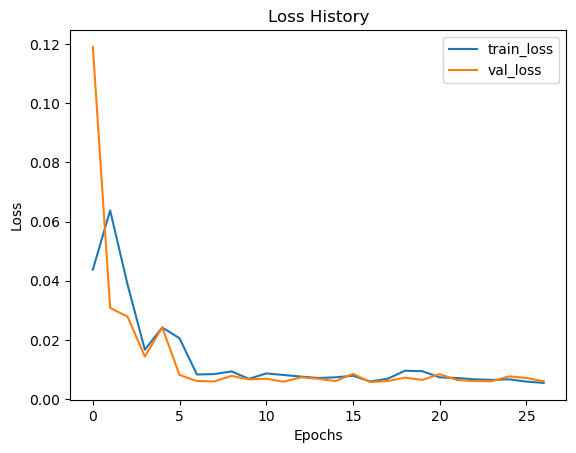

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

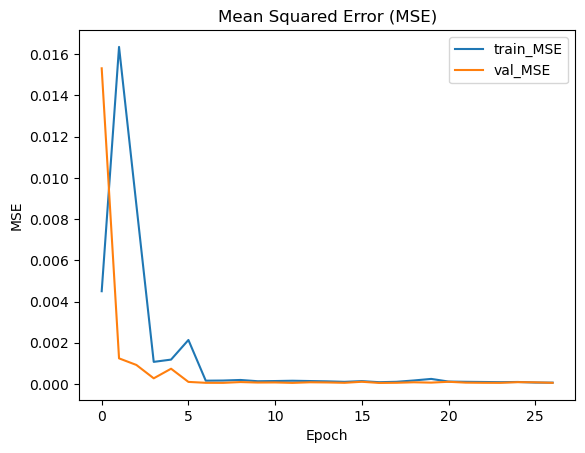

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

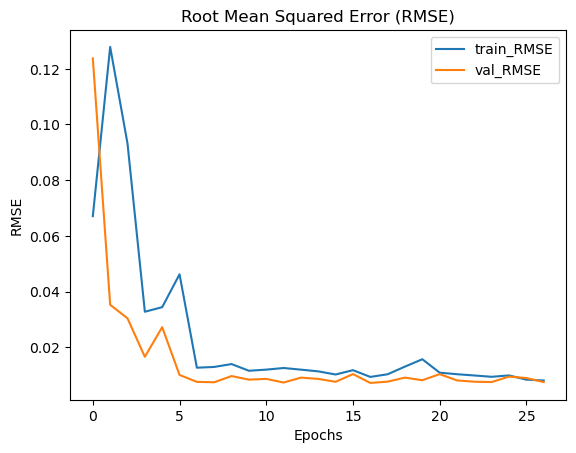

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

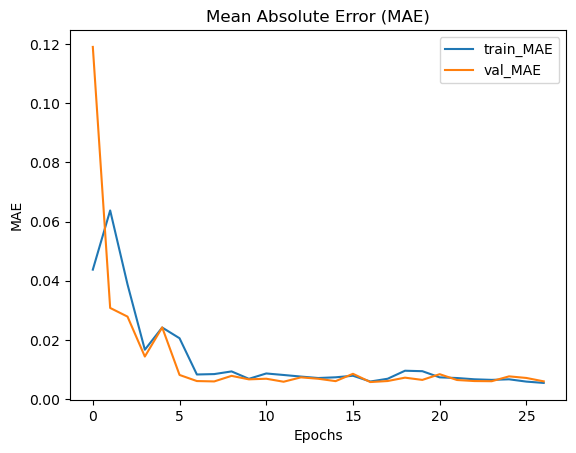

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

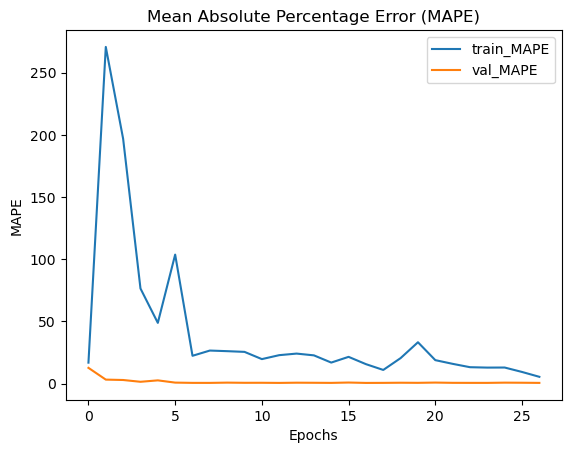

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:05:15.042292: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 2)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


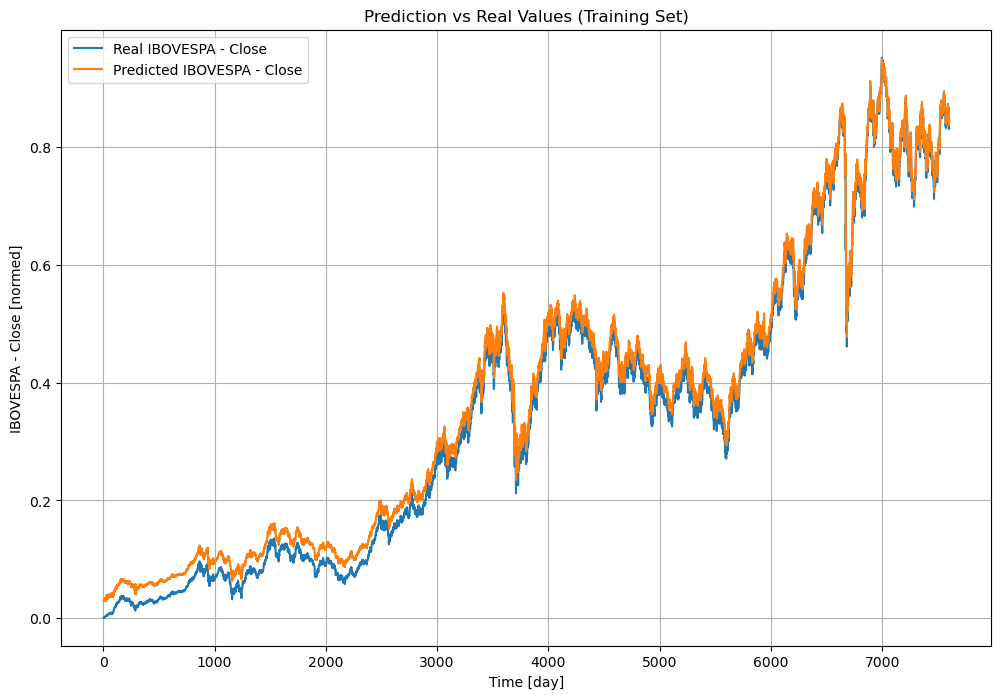

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


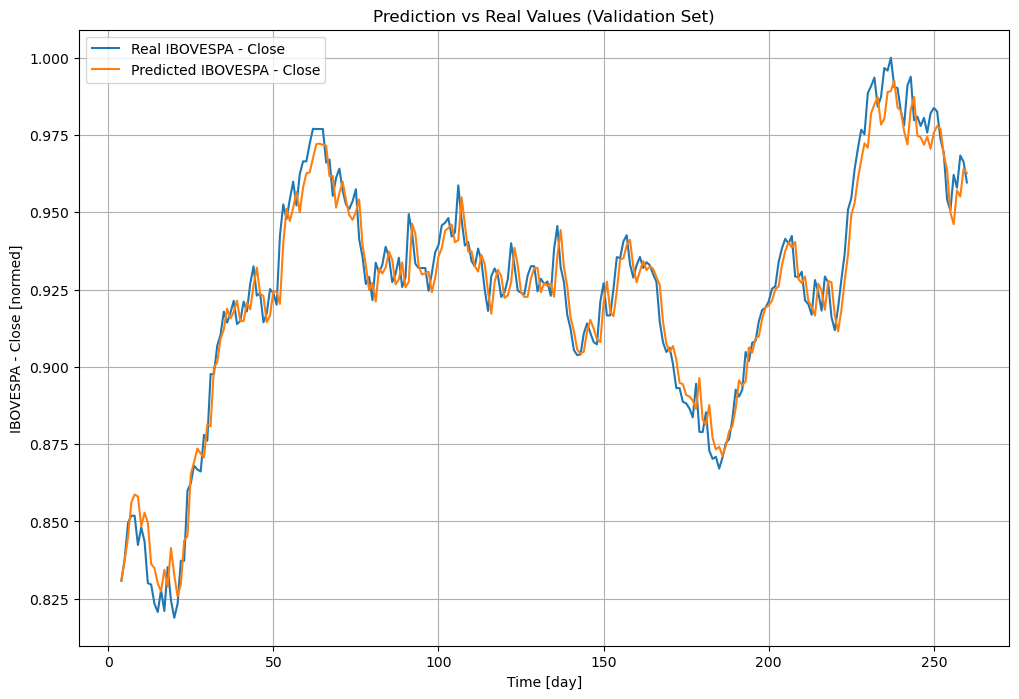

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


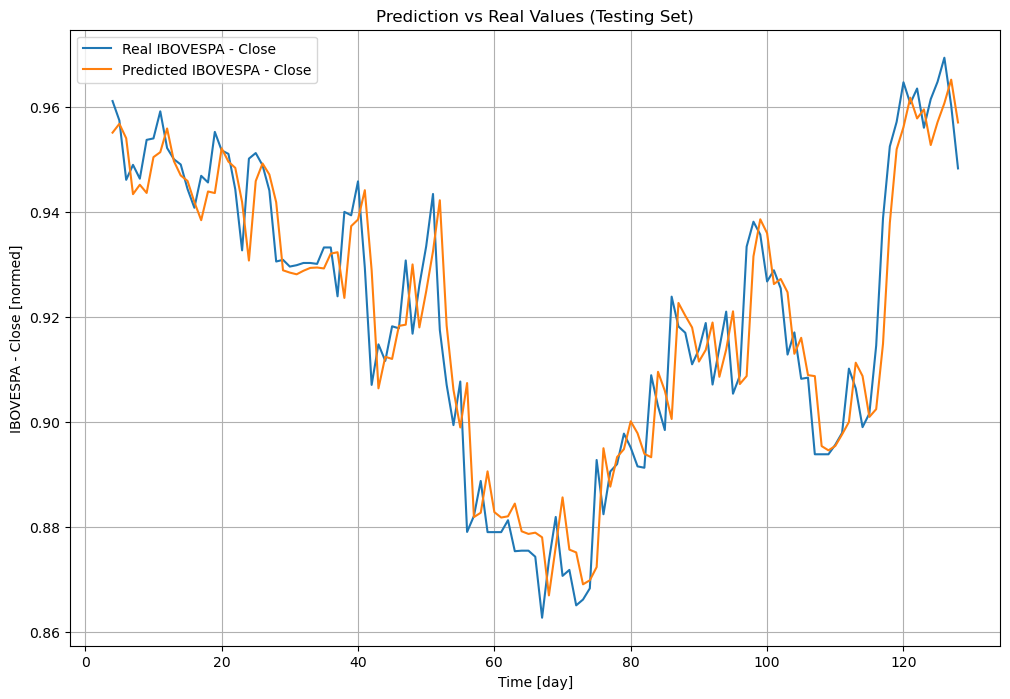

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

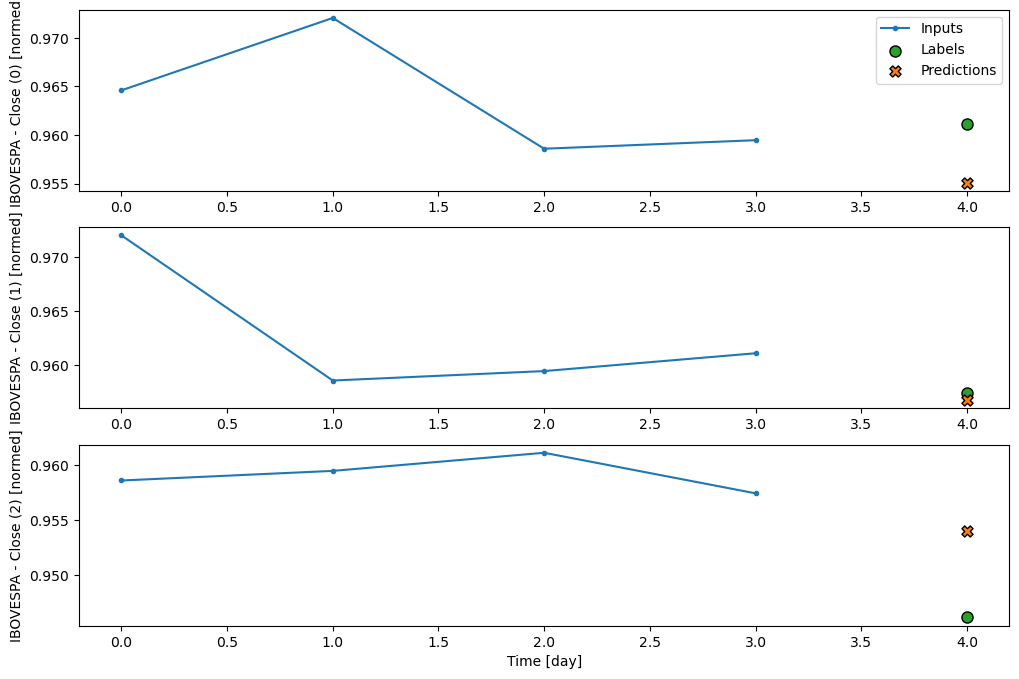

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:51s:271ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


array([[[0.95509493, 0.95509493, 0.95509493, ..., 0.95509493,
         0.95509493, 0.95509493]],

       [[0.956776  , 0.956776  , 0.956776  , ..., 0.956776  ,
         0.956776  , 0.956776  ]],

       [[0.9540276 , 0.9540276 , 0.9540276 , ..., 0.9540276 ,
         0.9540276 , 0.9540276 ]],

       ...,

       [[0.96069604, 0.96069604, 0.96069604, ..., 0.96069604,
         0.96069604, 0.96069604]],

       [[0.9651928 , 0.9651928 , 0.9651928 , ..., 0.9651928 ,
         0.9651928 , 0.9651928 ]],

       [[0.9570322 , 0.9570322 , 0.9570322 , ..., 0.9570322 ,
         0.9570322 , 0.9570322 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')